<a href="https://colab.research.google.com/github/moajjem04/TrafficSignal/blob/main/TrafficSignal_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Changing Directory to the Github Folder

In [2]:
%pwd

'/content'

In [3]:
%cd drive/MyDrive/TrafficSignal_1/TrafficSignal

/content/drive/MyDrive/TrafficSignal_1/TrafficSignal


In [4]:
%pwd

'/content/drive/MyDrive/TrafficSignal_1/TrafficSignal'

### Visualizing Images

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

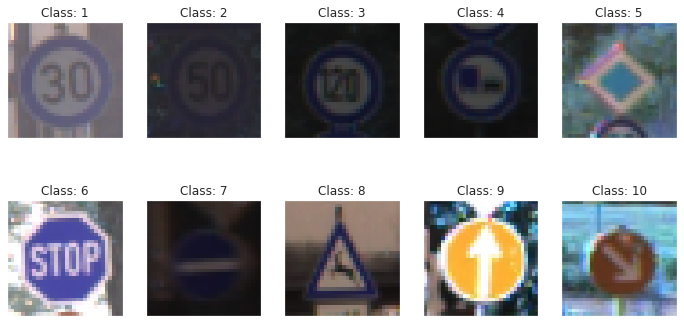

In [66]:
import cv2 as cv
from skimage import io

fig, axs = plt.subplots(2, 5, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axs.ravel()):
  sFolder = "{0:0=5d}".format(i+1) # Format nNumFolder to folder names
  path = 'training/' + sFolder + '/00000_00009.ppm'
  Img= cv.imread(path)
  Img = transform.resize(Img,(32,32))
  ax.imshow(Img)
  ax.set_title('Class: ' + str(i+1))





### Deciding the Cell Size for feature extraction

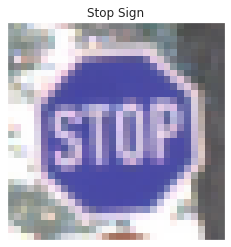

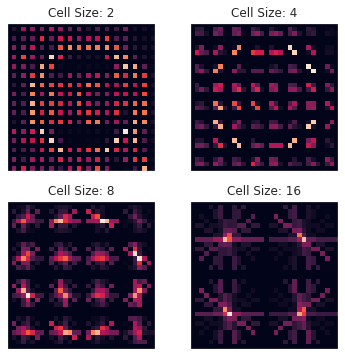

In [78]:
from skimage import color, feature, transform
image = cv.imread('training/00006/00000_00009.ppm')
image = transform.resize(image,(32,32))
plt.axes(xticks=[],yticks =[])
plt.title('Stop Sign')
plt.imshow(image);
fig, axs = plt.subplots(2, 2, figsize=(6, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
cell_size = (2,4,8,16)

for i, ax in enumerate(axs.ravel()):
  hog_vec, hog_vis = feature.hog(image,pixels_per_cell=(cell_size[i], cell_size[i]),
                                           cells_per_block=(3, 3),visualize = True)
  ax.imshow(hog_vis)
  ax.set_title('Cell Size: ' + str(cell_size[i]))  


# Feature Extraction from Training Images

In [10]:
import glob
count =0;
train_image_num = 400;
train_class =10;
trainingFeatures = np.zeros(shape=(train_image_num*train_class,324))
trainingLabels = np.zeros(shape=(train_image_num*train_class,1))
for nNumFolder in range(1,11):
  print(nNumFolder)
  sFolder = "{0:0=5d}".format(nNumFolder) # Format nNumFolder to folder names
  print(sFolder)
  path = 'training/' + sFolder + '/*.ppm' 
  for file in glob.glob(path):
   #print(file)
   Img= cv.imread(file)
   Img = transform.resize(Img,(32,32))
   trainingFeatures[count,:] = feature.hog(Img,pixels_per_cell=(8, 8),
                                           cells_per_block=(3, 3))
   trainingLabels[count,:] = nNumFolder
   count = count+1;

print(trainingLabels.shape)
print(trainingFeatures.shape)


1
00001
2
00002
3
00003
4
00004
5
00005
6
00006
7
00007
8
00008
9
00009
10
00010
(4000, 1)
(4000, 324)


# Feature Extraction from Testing Images

In [11]:
count =0;
test_image_num = 100;
test_class =10;
testingFeatures = np.zeros(shape=(test_image_num*test_class,324))
testingLabels = np.zeros(shape=(test_image_num*test_class,1))
for nNumFolder in range(1,11):
  print(nNumFolder)
  sFolder = "{0:0=5d}".format(nNumFolder) # Format nNumFolder to folder names
  print(sFolder)
  path = 'testing/' + sFolder + '/*.ppm' 
  for file in glob.glob(path):
   #print(file)
   Img= cv.imread(file)
   Img = transform.resize(Img,(32,32))
   testingFeatures[count,:] = feature.hog(Img,pixels_per_cell=(8, 8),
                                           cells_per_block=(3, 3))
   testingLabels[count,:] = nNumFolder
   count = count+1;

print(testingLabels.shape)
print(testingFeatures.shape)


1
00001
2
00002
3
00003
4
00004
5
00005
6
00006
7
00007
8
00008
9
00009
10
00010
(1000, 1)
(1000, 324)


In [12]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [21]:
lin_clf = LinearSVC()
lin_clf.fit(trainingFeatures,trainingLabels.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
Y_pred = lin_clf.predict(testingFeatures)

In [23]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(testingLabels,Y_pred))
print("\n")
print(classification_report(testingLabels,Y_pred))

print("Training set score for SVM: %f" % lin_clf.score(trainingFeatures , trainingLabels))
print("Testing  set score for SVM: %f" % lin_clf.score(testingFeatures  , testingLabels ))

lin_clf.score

[[ 63  20  10   1   1   4   0   0   1   0]
 [  6  77   8   4   1   1   0   0   1   2]
 [ 41   5  52   2   0   0   0   0   0   0]
 [  0   0   3  97   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0   0 100]]


              precision    recall  f1-score   support

         1.0       0.57      0.63      0.60       100
         2.0       0.75      0.77      0.76       100
         3.0       0.71      0.52      0.60       100
         4.0       0.93      0.97      0.95       100
         5.0       0.98      1.00      0.99       100
         6.0       0.95      1.00      0.98       100
         7.0       1.00      1.00      1.00       100
         8.0       1.00      1.00      1.00       100
         9.0       0.98      1.00      0.99       100
        10.0       0.98   

<bound method ClassifierMixin.score of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)>

# Hyperparameter Tuning

In [16]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.1,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000]}]

In [25]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5, verbose=1)
svm_model.fit(trainingFeatures,trainingLabels.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [26]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(testingFeatures)

Best score for training data: 0.907 

Best C: 1 

Best Kernel: linear 

Best Gamma: scale 



In [27]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(testingLabels,Y_pred))
print("\n")
print(classification_report(testingLabels,Y_pred))

print("Training set score for SVM: %f" % final_model.score(trainingFeatures , trainingLabels))
print("Testing  set score for SVM: %f" % final_model.score(testingFeatures  , testingLabels ))

final_model.score

[[ 68  17  11   0   0   2   0   0   2   0]
 [ 14  73  13   0   0   0   0   0   0   0]
 [ 41   3  56   0   0   0   0   0   0   0]
 [  0   0   1  99   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   1   0   0   0  99   0   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   2   0   0   0   0   0   0   0  98]]


              precision    recall  f1-score   support

         1.0       0.55      0.68      0.61       100
         2.0       0.76      0.73      0.74       100
         3.0       0.69      0.56      0.62       100
         4.0       1.00      0.99      0.99       100
         5.0       1.00      1.00      1.00       100
         6.0       0.98      0.99      0.99       100
         7.0       1.00      1.00      1.00       100
         8.0       1.00      1.00      1.00       100
         9.0       0.98      1.00      0.99       100
        10.0       1.00   

<bound method ClassifierMixin.score of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>